In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [5]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [5]:
!kaggle datasets download -d gti-upm/leapgestrecog

100% 2.12G/2.13G [00:28<00:00, 71.9MB/s]
100% 2.13G/2.13G [00:28<00:00, 79.4MB/s]


In [7]:
!ls

checkpoint							__pycache__
dataset								report.log
fixed_path.yaml							runs
helper_functions.py						temp_weights.h5
kaggle.json							test.yaml
leapgestrecog.zip						yolov3-objectdetection.ipynb
pests_cats_classification_model_checkpoint.data-00000-of-00001	yolov8n.pt
pests_cats_classification_model_checkpoint.index		yolov8s.pt


In [8]:
!unzip \*.zip -d handgesturedata

Streaming output truncated to the last 5000 lines.
  inflating: handgesturedata/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0001.png  
  inflating: handgesturedata/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0002.png  
  inflating: handgesturedata/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0003.png  
  inflating: handgesturedata/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0004.png  
  inflating: handgesturedata/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0005.png  
  inflating: handgesturedata/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0006.png  
  inflating: handgesturedata/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0007.png  
  inflating: handgesturedata/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0008.png  
  inflating: handgesturedata/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0009.png  
  inflating: handgesturedata/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0010.png  
  inflating: handgesturedata/

In [2]:
import warnings
warnings.filterwarnings('ignore')

import keras
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np

from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout

In [7]:
CATEGORIES = ["01_palm", '02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']
IMG_SIZE = 50

data_path = "/content/gdrive/MyDrive/Kaggle/handgesturedata/leapGestRecog"

In [10]:
image_data = []
for dr in os.listdir(data_path):
    for category in CATEGORIES:
        class_index = CATEGORIES.index(category)
        path = os.path.join(data_path, dr, category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                image_data.append([cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)), class_index])
            except Exception as e:
                pass
image_data[0]

[array([[5, 4, 4, ..., 3, 4, 2],
        [5, 4, 5, ..., 3, 3, 3],
        [4, 5, 4, ..., 4, 5, 3],
        ...,
        [4, 5, 5, ..., 5, 5, 5],
        [5, 5, 6, ..., 5, 7, 4],
        [4, 7, 5, ..., 5, 4, 4]], dtype=uint8),
 0]

In [11]:
# shuffle the input data
import random
random.shuffle(image_data)

In [12]:
input_data = []
label = []
for X, y in image_data:
    input_data.append(X)
    label.append(y)

In [13]:
label[:10]

[7, 4, 7, 7, 4, 0, 6, 5, 8, 0]

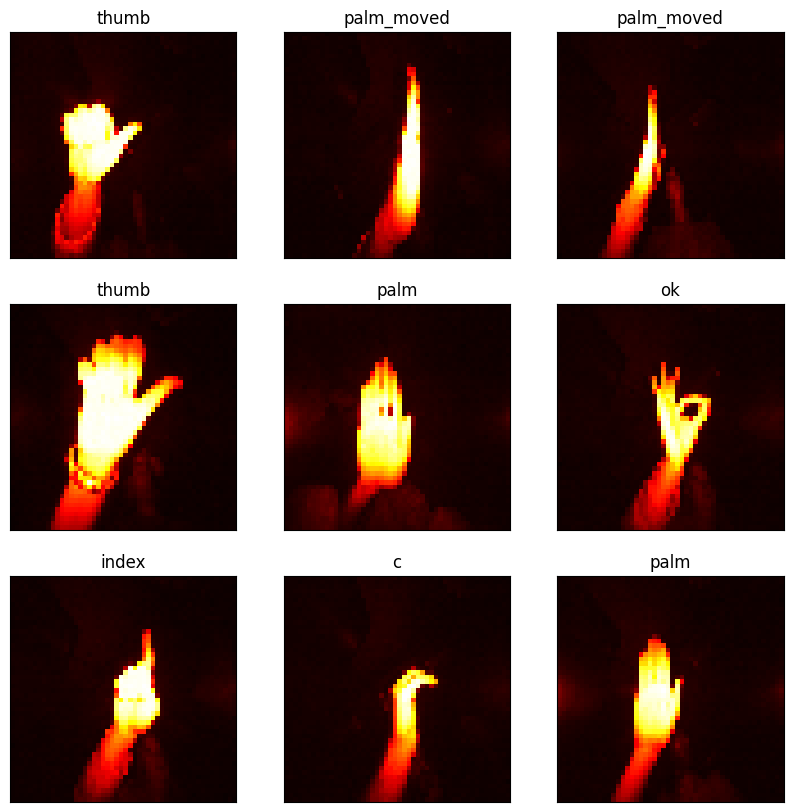

In [14]:
plt.figure(1, figsize=(10,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(image_data[i][0], cmap='hot')
    plt.xticks([])
    plt.yticks([])
    plt.title(CATEGORIES[label[i]][3:])
plt.show()

In [15]:
# Normalizing the data
input_data = np.array(input_data)
label = np.array(label)
input_data = input_data/255.0
input_data.shape

(20000, 50, 50)

In [16]:
label = keras.utils.to_categorical(label, num_classes=10,dtype='i1')
label[0]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int8)

In [17]:
# reshaping the data
input_data.shape = (-1, IMG_SIZE, IMG_SIZE, 1)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.3, random_state=0)

In [19]:
model = keras.models.Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (IMG_SIZE, IMG_SIZE, 1)))
model.add(Activation('relu'))


model.add(Conv2D(filters = 32, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

In [20]:
model.fit(X_train, y_train, epochs = 7, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/7
438/438 [==============================] - 117s 260ms/step - loss: 0.3499 - accuracy: 0.8847 - val_loss: 0.0115 - val_accuracy: 0.9963
Epoch 2/7
438/438 [==============================] - 116s 265ms/step - loss: 0.0213 - accuracy: 0.9946 - val_loss: 0.0038 - val_accuracy: 0.9987
Epoch 3/7
438/438 [==============================] - 115s 262ms/step - loss: 0.0101 - accuracy: 0.9969 - val_loss: 0.0043 - val_accuracy: 0.9987
Epoch 4/7
438/438 [==============================] - 114s 261ms/step - loss: 0.0060 - accuracy: 0.9981 - val_loss: 5.7450e-04 - val_accuracy: 0.9998
Epoch 5/7
438/438 [==============================] - 119s 272ms/step - loss: 0.0045 - accuracy: 0.9986 - val_loss: 2.3649e-04 - val_accuracy: 0.9998
Epoch 6/7
438/438 [==============================] - 109s 249ms/step - loss: 0.0056 - accuracy: 0.9989 - val_loss: 1.1265e-04 - val_accuracy: 1.0000
Epoch 7/7
438/438 [==============================] - 110s 252ms/step - loss: 0.0029 - accuracy: 0.9994 - val_loss: 8.8

In [21]:
# Save the entire model
model.save('/content/gdrive/MyDrive/hestureRec_model.h5')

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 46, 46, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 23, 23, 32)        0         
                                                        

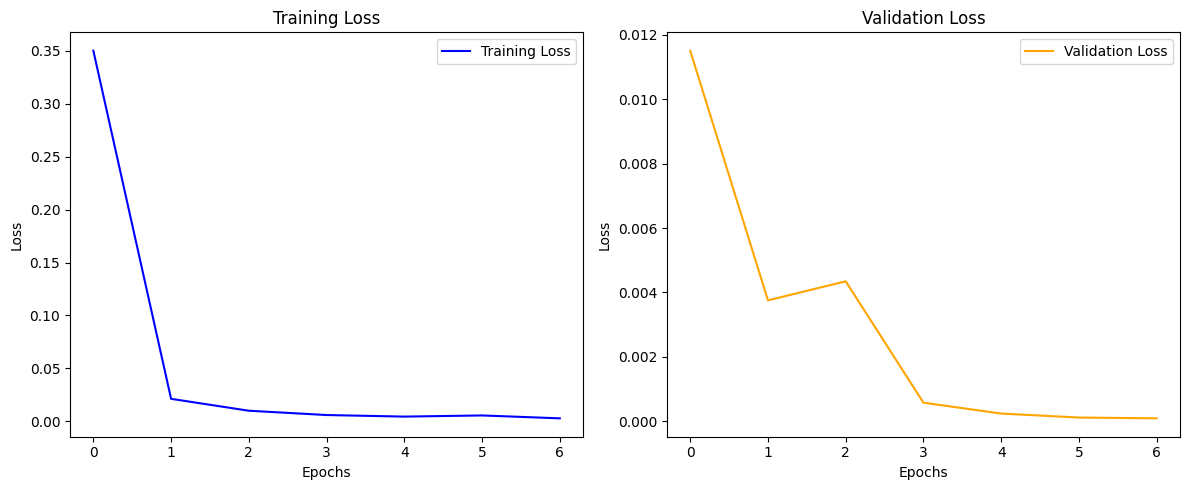

In [23]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(model.history.history['loss'], label='Training Loss', color='blue')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting Validation Loss
plt.subplot(1, 2, 2)
plt.plot(model.history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

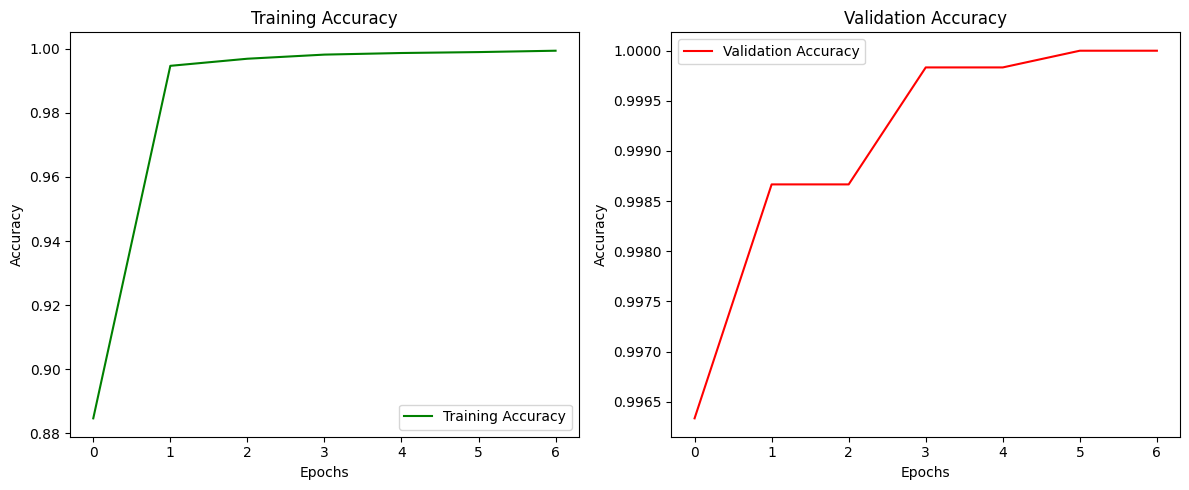

In [24]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(model.history.history['accuracy'], label='Training Accuracy', color='green')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(model.history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

188/188 [==============================] - 17s 89ms/step - loss: 8.8239e-05 - accuracy: 1.0000
Test accuracy: 100.00%


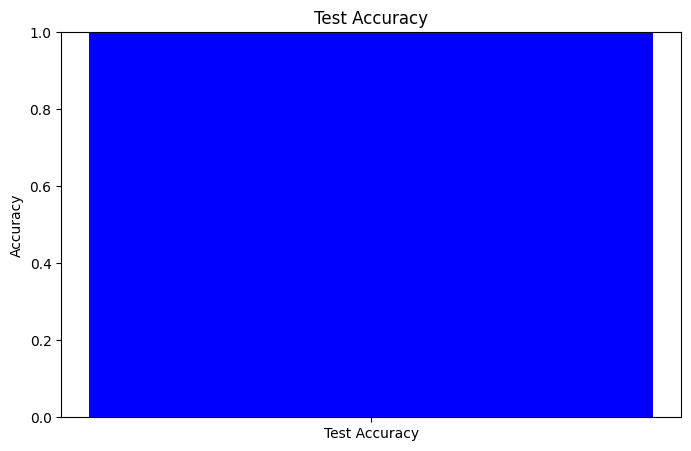

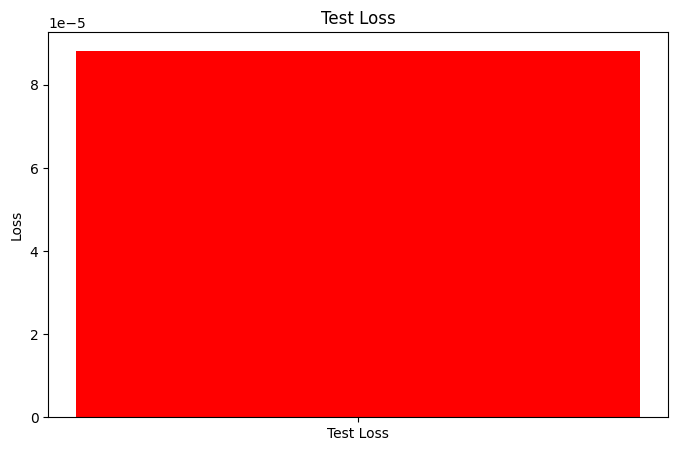

In [25]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

# Visualize Test Accuracy
plt.figure(figsize=(8, 5))
plt.bar(['Test Accuracy'], [test_accuracy], color=['blue'])
plt.ylim(0, 1)  # Assuming accuracy is between 0 and 1
plt.title('Test Accuracy')
plt.ylabel('Accuracy')
plt.show()

# Visualize Test Loss
plt.figure(figsize=(8, 5))
plt.bar(['Test Loss'], [test_loss], color=['red'])
plt.title('Test Loss')
plt.ylabel('Loss')
plt.show()

188/188 [==============================] - 11s 59ms/step


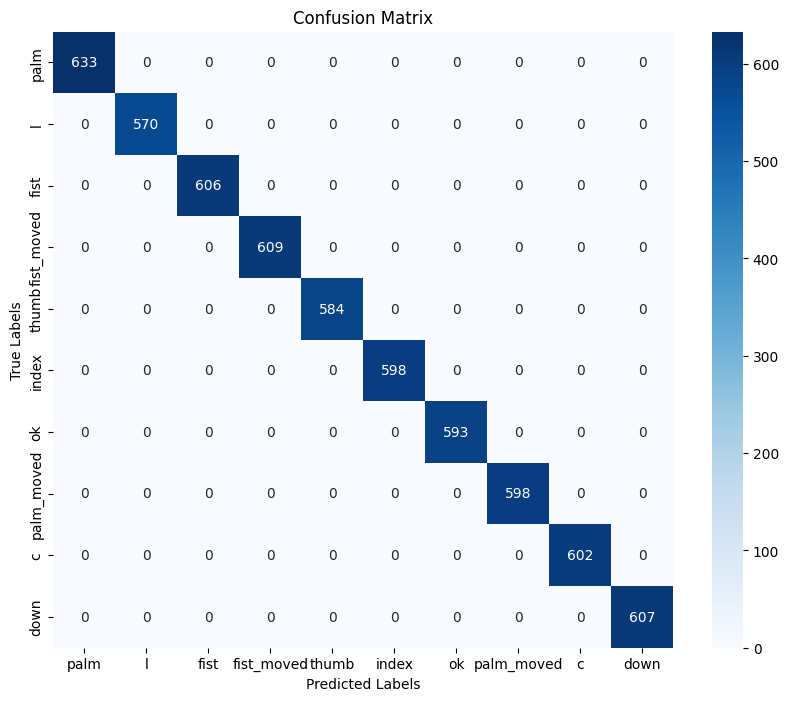

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

cat = [c[3:] for c in CATEGORIES]

# Calculate the confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(model.predict(X_test), axis=1))

plt.figure(figsize=(10, 8))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cat, yticklabels=cat)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [3]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('D:/internship/hestureRec_model.h5')

1/1 [==============================] - 0s 17ms/step


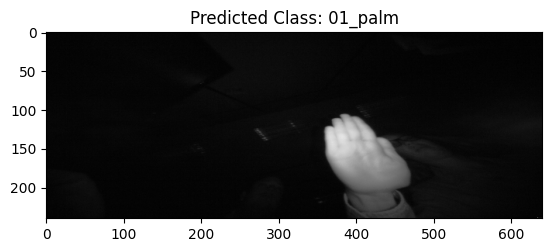

In [15]:
import matplotlib.pyplot as plt

# Assuming you have an image file named 'test_image.jpg'
image_path = '/content/gdrive/MyDrive/Kaggle/handgesturedata/leapGestRecog/00/01_palm/frame_00_01_0001.png'

# Read and preprocess the image
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Assuming the image is grayscale
img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
img = np.expand_dims(img, axis=0)  # Add batch dimension
img = img / 255.0  # Normalize pixel values

# Make prediction
predictions = model.predict(img)

# Get the predicted class index
predicted_class_index = np.argmax(predictions)
predicted_class_name = CATEGORIES[predicted_class_index]

# Display the image
plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
plt.title(f'Predicted Class: {predicted_class_name}')
plt.show()

In [6]:
CATEGORIES = ["01_palm", '02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']

# Assuming IMG_SIZE is the size expected by your model
IMG_SIZE = 64


# Open a connection to the camera (usually 0 for built-in cameras)
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()

    # Preprocess the frame
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    img = cv2.resize(img, (50, 50))
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    img = img / 255.0  # Normalize pixel values

    # Make prediction
    predictions = model.predict(img)

    # Get the predicted class index
    predicted_class_index = np.argmax(predictions)
    predicted_class_name = CATEGORIES[predicted_class_index]

    # Display the frame with the predicted class name
    cv2.putText(frame, f'Predicted Class: {predicted_class_name}', (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    cv2.imshow('Live Camera Feed', frame)

    # Break the loop if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 30ms/step
